# Worked Problems for Assessment, Computer Infrastructure Module  
Autumn 2025, Atlantic Technological University  
Author: Susan Collins  

## Introduction

This notebook provides a documented walkthrough of an automated data acquisition and visualisation pipeline for hourly FAANG stock price data.   
Accessing, storing and processing real-world dynamic data, such as financial data, is a common requirement in data analytics workflows. Manual approaches can be error-prone, difficult to reproduce, and the repetition of work is a burden on the end-user. 
To address this, the project builds upon established tools and documentation, including Python’s data analysis ecosystem and GitHub Actions for workflow automation, to implement a reproducible and automated computational pipeline.  
Each section of the notebook explains the purpose and design of the code in context, explaining how data is acquired, processed, stored, and visualised using standard programming practices, with the aim of making both the technical implementation and infrastructure choices clear to a knowledgeable reader.

## Problem 1: Data from yfinance  
Brief:

> Using the [yfinance](https://github.com/ranaroussi/yfinance) Python package, write a function called `get_data()` that downloads all hourly data for the previous five days for the five FAANG stocks:
> 
>  -   Facebook (META)
>  -   Apple (AAPL)
>  -   Amazon (AMZN)
>  -   Netflix (NFLX)
>  -   Google (GOOG)
>
> The function should save the data into a folder called `data` in the root of your repository using a filename with the format `YYYYMMDD-HHmmss.csv` where `YYYYMMDD` is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. `09` for September), followed by the two digit day, and `HHmmss` is hour, minutes, seconds.  
> Create the `data` folder if you don't already have one.


### Approach

[`yfinance`](https://github.com/ranaroussi/yfinance) is an open-source code 
library that allows Yahoo Finance's stock market data to be accessed via Python code.  

Here we will create, explain, and run functions to: 
- `get_finance_data_hourly()`: Download stock data to a Pandas DataFrame
- `csv_filename_from_now()`: Generate a CSV output filename from the current date and time
- `check_directory()`: Check for a directory and create it if it doesn't exist

Then, the function `get_data()` uses the above helper functions to download all 
hourly data for the past 5 days for the five FAANG stocks, and writes them to CSV.

### Importing libraries

In [1]:
# Module for handling date and time data, 
# https://docs.python.org/3/library/datetime.html
import datetime as dt

# Module for interfacing with the operating system, 
# https://docs.python.org/3/library/os.html
import os 

# Module for regular expressions, used for string matching 
# https://docs.python.org/3/library/re.html
import re

# import NumPy to manipulate numerical arrays
# https://numpy.org/doc/stable/
import numpy as np

# import Python Data Analysis Library
# https://pandas.pydata.org/docs/
import pandas as pd

# import Matplotlib.PyPlot for plotting
# https://matplotlib.org/stable/api/pyplot_summary.html
import matplotlib.pyplot as plt

# import yfinance for financial data for these exercises
# https://github.com/ranaroussi/yfinance
import yfinance as yf


### Downloading financial data from Yahoo Finance using `yfinance`  
The [yfinance documentation](https://ranaroussi.github.io/yfinance/) front page
contains a Quick Start guide with helpful code examples. 
The [`yfinance.download`](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html) function returns a Pandas DataFrame. 


_Note:  The call to `yfinance.download` produces a FutureWarning to alert users 
that the default value of the `auto_adjust` argument has changed.   
This [StackOverflow answer](https://stackoverflow.com/a/37453925) says that the auto_adjust parameter will adjust the historical stock prices for splits and dividends, so that long-term comparisons of stick prices can be made. If I explicitly call the parameter with its default value of True, the annoying warning is suppressed._

In [2]:
# Set list of stock tickers for which we want to download data
tickers = ['META','AAPL','AMZN','NFLX','GOOG']

# Function to download hourly finance data for list of stock trackers
def get_finance_data_hourly(ticker_list, period='5d'):
    """Download Yahoo Finance data for supplied list of trackers, 
    default period 5 days.
    """

    # Use the yfinance.download function with ticker list
    downloaded_dataframe = yf.download(
        ticker_list, period=period, interval='1h', auto_adjust=True)

    # Print the shape of the resulting DataFrame, as debugging info.
    print(f"Downloaded DataFrame Shape: {downloaded_dataframe.shape}")
    return(downloaded_dataframe)

# Run this function for the list of tickers we made.
df_downloaded = get_finance_data_hourly(tickers)

[*********************100%***********************]  5 of 5 completed

Downloaded DataFrame Shape: (35, 25)


### Creating output filename

In [3]:
# Function to generate a CSV filename from the current date and time
def csv_filename_from_now():
    "Generate a CSV filename from the current date and time."
    
    # Get current date and time.
    now = dt.datetime.now()

    # Use datetime.datetime.strftime to create the output filename  
    # as a string, formatted as per this assignment's instructions.  
    # (Handy cheat sheet for strftime format specifiers available at
    # https://strftime.org/)
    csv_filename = now.strftime("%Y%m%d-%H%M%S.csv")
        
    # Print result for the user.
    print(f"Generated CSV filename is {csv_filename}.")

    # Return the generated filename
    return csv_filename

# Run this function and store the generated filename
data_output_filename = csv_filename_from_now()


Generated CSV filename is 20251221-235144.csv.


### Checking for output directory

In [4]:
# Set the directory for the output CSV files.
data_output_dir = "data/"

# Function to check if a directory exists and create it if necessary.
def check_directory(directory_to_check):
    """Check if a specified directory exists, if not, create the directory."""
    
    if not os.path.isdir(directory_to_check):
        os.makedirs(directory_to_check)
        print(f"Created directory at {directory_to_check}")
    else:
        print(f"Directory exists at {directory_to_check}")

# Run this function for the data output directory
check_directory(data_output_dir)

Directory exists at data/


### Writing financial data to CSV file  
This function `get_data()` uses the three functions defined above to download the stock data and write it to CSV.  
Pandas has a function [`pandas.DataFrame.to_csv`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) to write to CSV files.

In [5]:
# Function to download all hourly finance data, and export to CSV file
def get_data():
    """Download hourly stock data, export to CSV file named with datetime."""
    
    # Download hourly stock data
    df_downloaded = get_finance_data_hourly(tickers)

    # Check for output data directory
    check_directory(data_output_dir)
    
    # Generate the filename fo the output data
    data_output_filename = csv_filename_from_now()

    # Write DataFrame to CSV file in data directory.
    df_downloaded.to_csv(data_output_dir + data_output_filename)
    print(f"Data written to {data_output_dir + data_output_filename}")

# Calling this function, will re-download and re-store the data to CSV
get_data()

[*********************100%***********************]  5 of 5 completed

Downloaded DataFrame Shape: (35, 25)
Directory exists at data/
Generated CSV filename is 20251221-235144.csv.
Data written to data/20251221-235144.csv


## Problem 2: Plotting Data  
Brief:  

> Write a function called `df_to_plot()` that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks.  
> The plot should include axis labels, a legend, and the date as a title.  
> The function should save the plot into a `plots` folder in the root of your repository using a filename in the format `YYYYMMDD-HHmmss.png`.  
> Create the `plots` folder if you don't already have one.  


### Approach

Again, we create, explain and run helper functions:
- `get_latest_valid_file()`: Finds the latest CSV file in a supplied directory
- `read_stock_data_from_csv()`: Reads the stored data from CSV to DataFrame
- `remove_filename_extension()`: Remove the file extension of the CSV filename, to store the data timestamp as a string
- `make_png_from_finance_data()`: Create a PNG plot of the Close prices and Volume values in the data.

Then, the function `plot_data()` uses the above helper functions to read and plot the data.

### Checking for the read-in  data directory  

This section of code may be run independently of the previous section, so we must  
check again that the data directory exists.

In [6]:
# Set the directory from which to read CSV files.
data_read_dir = "data/"

# Check if this directory exists, using function defined in the previous section
check_directory(data_read_dir)

Directory exists at data/


### Finding the latest CSV file  
Approach: 
- List the files in the data directory
- Find those with appropriate filenames using a regex pattern
- Sort them by name (which should be the file creation time)
- Get the name of the newest file

In [7]:
# Function to get the latest valid data file, using filename
def get_latest_valid_file(directory):
    """Return the file in a directory with the latest timestamp in the 
    filename.
    """

    # List the files in the data_read directory
    files_in_directory = os.listdir(directory)

    # Filter for the files that match the expected data filename format,
    # i.e. YYYYMMDD-HHmmss.csv 
    # (adapted from https://stackoverflow.com/a/56223939) 
    # regex reference: https://www.w3schools.com/python/python_regex.asp

    # Search pattern to match valid data files
    search_pattern = r'[0-9]{8}[-][0-9]{6}\.csv$'
    # Create empty list to hold matching filenames
    files_match_pattern= []

    # Iterate through the files in the data_read directory and get the 
    # ones with filenames matching the pattern 
    for file in files_in_directory:
        if re.match(search_pattern, file):
            # If a filename matches the regex string, add it to the new list
            files_match_pattern.append(file)

    # Sort the filtered data files to get the latest one
    latest_filename = sorted(files_match_pattern, reverse=True)[0]

    # Print info for user:
    print(f"Directory {directory} contains {len(files_match_pattern)} files "
        f"with appropriate filenames: the latest one is {latest_filename}.")

    # Return the final data filename
    return(latest_filename)

# Run this function on the data storage directory and store the filename
data_read_filename = get_latest_valid_file(data_read_dir)

Directory data/ contains 6 files with appropriate filenames: the latest one is 20251221-235144.csv.


### Reading in from the CSV file  
This function must correctly parse the datetime index of the data in the CSV file, and the nested column names.

In [8]:
def read_stock_data_from_csv(file):
    """Read stock data from a CSV file that was written from a 
    yfinance download.
    """

    # Reading DataFrame from CSV file using pandas.read_csv()
    # (Ref: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).
    # Parameters:
    # header=[0,1] - The first two rows of the CSV file contain 
    # MultiIndex header information,
    # index_col=0 - I want column 0, the dates, to be the index of the 
    # resulting DataFrame,
    # parse_dates=[0] - I want the index values to be parsed as dates 
    # (i.e. as datetime objects.)
    # (adapted from https://stackoverflow.com/a/37453925)
    dataframe_read = pd.read_csv(file, header=[0,1], 
                                index_col=0, parse_dates=[0])

    # Print info to let the user know what has been done
    print(f"Read in: {file}")

    # Return the new DataFrame
    return dataframe_read

# Run this function on the stored data filepath and filename
df_to_plot = read_stock_data_from_csv(data_read_dir + data_read_filename)

# Look at the first 5 rows of the read-in DataFrame.
df_to_plot.head(5)

Read in: data/20251221-235144.csv


Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-15 14:30:00+00:00  274.144989  223.029999  307.730011  641.054993   
2025-12-15 15:30:00+00:00  275.510010  224.389999  308.829987  650.545105   
2025-12-15 16:30:00+00:00  274.920013  222.544998  306.142609  650.309998   
2025-12-15 17:30:00+00:00  274.040009  222.375000  307.450012  650.219971   
2025-12-15 18:30:00+00:00  273.369995  223.222595  308.540009  651.219971   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-15 14:30:00+00:00  94.004997  280.049988  227.500000  311.359985   
2025-12-15 15:30:00+00:00  94.430000  275.640411  224.389999  309.390015   
2025-12-15 16:30:00+00:00  94.000000  275.695007  224.500000  308.880005   
2025-12-15 17:30:00+00:00  93.644997  275.100006  223.080002  307.899994   
2025-12-15 18:30:00+00:00  93.959900  274.250000  223.434998  309.369995   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-15 14:30:00+00:00  649.650024  96.065002  ...  280.000000  227.000000   
2025-12-15 15:30:00+00:00  650.760010  94.559998  ...  274.170013  223.039993   
2025-12-15 16:30:00+00:00  651.390015  94.441002  ...  275.540009  224.440002   
2025-12-15 17:30:00+00:00  652.320007  94.230003  ...  274.924988  222.544998   
2025-12-15 18:30:00+00:00  652.159973  94.165001  ...  274.019989  222.380005   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-15 14:30:00+00:00  310.625000  644.250000  96.000000  8113962   
2025-12-15 15:30:00+00:00  307.730011  640.929993  94.004997  3495538   
2025-12-15 16:30:00+00:00  308.839996  650.619995  94.430000  2136284   
2025-12-15 17:30:00+00:00  306.239990  650.369995  94.004997  1992688   
2025-12-15 18:30:00+00:00  307.444794  650.099976  93.644997  2430153   

Price                                                          
Ticker                        AMZN     GOOG     META     NFLX  
Datetime                                                       
2025-12-15 14:30:00+00:00  6475168  3980818  2264723  5610795  
2025-12-15 15:30:00+00:00  2713407  1244270  1317447  2675928  
2025-12-15 16:30:00+00:00  2914110  1951626   846923  2181275  
2025-12-15 17:30:00+00:00  2010556  1006522   647454  2296090  
2025-12-15 18:30:00+00:00  2315546  1034648   545846  1941943  

[5 rows x 25 columns]

#### Sidebar: explore ways to compare the downloaded and read-from-csv DataFrames  
For the purposes of this notebook, we can compare the downloaded DataFrame to 
the DataFrame read in from the CSV file.  
We would expect them to be identical. 
If they are not, this would indicate that the data has not been 
exported and read back in accurately.

There is a [`pandas.DataFrame.compare`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.compare.html) 
function that compares two DataFrames and returns another DataFrame. The resulting DataFrame shows 
all non-matching values (and NaN everywhere the values ARE a match.)

Let's use it to compare the DataFrame downloaded from `yfinance`, and the DataFrame read in from our CSV file.

In [9]:
# Compare the downloaded and read-from-file DataFrames, 
# and show the first 5 rows.
df_to_plot.compare(df_downloaded).head(5)

Price                     Close                                           \
Ticker                     AAPL              AMZN                   NFLX   
                           self other        self       other       self   
Datetime                                                                   
2025-12-15 14:30:00+00:00   NaN   NaN         NaN         NaN  94.004997   
2025-12-15 15:30:00+00:00   NaN   NaN         NaN         NaN        NaN   
2025-12-15 16:30:00+00:00   NaN   NaN         NaN         NaN        NaN   
2025-12-15 17:30:00+00:00   NaN   NaN         NaN         NaN        NaN   
2025-12-15 18:30:00+00:00   NaN   NaN  223.222595  223.222595  93.959900   

Price                                High                                ...  \
Ticker                               AAPL              AMZN              ...   
                               other self other        self       other  ...   
Datetime                                                                 ...   
2025-12-15 14:30:00+00:00  94.004997  NaN   NaN         NaN         NaN  ...   
2025-12-15 15:30:00+00:00        NaN  NaN   NaN         NaN         NaN  ...   
2025-12-15 16:30:00+00:00        NaN  NaN   NaN         NaN         NaN  ...   
2025-12-15 17:30:00+00:00        NaN  NaN   NaN         NaN         NaN  ...   
2025-12-15 18:30:00+00:00  93.959900  NaN   NaN  223.434998  223.434998  ...   

Price                      Low       Open                              \
Ticker                    NFLX       AAPL       AMZN       GOOG         
                          self other self other self other self other   
Datetime                                                                
2025-12-15 14:30:00+00:00  NaN   NaN  NaN   NaN  NaN   NaN  NaN   NaN   
2025-12-15 15:30:00+00:00  NaN   NaN  NaN   NaN  NaN   NaN  NaN   NaN   
2025-12-15 16:30:00+00:00  NaN   NaN  NaN   NaN  NaN   NaN  NaN   NaN   
2025-12-15 17:30:00+00:00  NaN   NaN  NaN   NaN  NaN   NaN  NaN   NaN   
2025-12-15 18:30:00+00:00  NaN   NaN  NaN   NaN  NaN   NaN  NaN   NaN   

Price                                            
Ticker                          NFLX             
                                self      other  
Datetime                                         
2025-12-15 14:30:00+00:00        NaN        NaN  
2025-12-15 15:30:00+00:00  94.004997  94.004997  
2025-12-15 16:30:00+00:00        NaN        NaN  
2025-12-15 17:30:00+00:00  94.004997  94.004997  
2025-12-15 18:30:00+00:00        NaN        NaN  

[5 rows x 30 columns]

Above, the `pandas.DataFrame.compare` result has flagged many values as not identical, 
although they appear to be the same when printed on screen. This is due to the well-known limited precision of floating-point 
representation in Python (see discussions at [docs.python.org](https://docs.python.org/3/tutorial/floatingpoint.html), [GeeksforGeeks.org](https://www.geeksforgeeks.org/python/comparing-floating-points-number-for-almost-equality-in-python/), [RealPython.com](https://realpython.com/python-operators-expressions/#comparison-of-floating-point-values).)

Instead, we can use the [`numpy.isclose()`](https://numpy.org/doc/stable/reference/generated/numpy.isclose.html) function which can tell us when floating-point values are _approximately_ equal, to within a small tolerance. (Suggested by [this StackOverflow answer](https://stackoverflow.com/a/33549675).)

Below we will use `numpy.isclose()` to compare the two DataFrames again, and then use the [`numpy.ndarray.all()`](https://numpy.org/devdocs/reference/generated/numpy.ndarray.all.html#numpy.ndarray.all) method to check if the result is a match for every value.

In [10]:
# Compare the downloaded DataFrame to the DataFrame read from CSV, and 
# show the first three rows of results.
# The resulting array has True where there is a match, and False for no match.
print(np.isclose(df_downloaded,df_to_plot)[0:2,])

# Check if all the vales in the array of results are True. 
# If all array values are True, the result of all() is also True.
# (adapted from https://stackoverflow.com/a/55834412 and 
# https://numpy.org/devdocs/reference/generated/numpy.ndarray.all.html#numpy.ndarray.all) 
df_comparison_result = np.isclose(df_downloaded,df_to_plot).all()

# Print result.
print(f"Are all values in the np.isclose result array True? {df_comparison_result}")

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]]
Are all values in the np.isclose result array True? True


The result of the `numpy.isclose()` comparison shows that the DataFrame read in from the CSV file matches the downloaded DataFrame, meaning that our CSV export and import have preserved the data accurately.

### Preparing the plot output directory  
As before, we must check that the plot output directory exists, or create it.

In [11]:
# Set the plot output directory
plot_dir = "plots/"

# Check if the plot output directory exists
check_directory(plot_dir)

Directory exists at plots/


### Extracting the datetime string from the CSV file name

The filename of the CSV file represents the date and time at which the stock 
data was downloaded.  
The plotting function could be called some arbitrary time 
later; so, for accuracy, the resulting plot should be labelled with the 
**datetime of data download, not the datetime of plotting**.  
We can get a string containing the datetime of data download by taking the 
filename of the latest CSV file and removing the file extension.

In [12]:
# Function to remove the file extension from filename
# Adapted from https://stackoverflow.com/questions/3548673/how-can-i-replace-or-strip-an-extension-from-a-filename-in-python#comment126366159_3548689
def remove_filename_extension(file):
    """Removes the extension from a filename. 
    Assumes maximum of 2 period characters in filename.
    """
    # Split the string at the period character and return the first part.
    string = file.rsplit( ".", 2 )[ 0 ]
    return string

# Run this function on the filename of the latest CSV file, found above
data_timestamp_string = remove_filename_extension(data_read_filename)
# Show result
data_timestamp_string

'20251221-235144'

### Plotting the data  
Pandas has its own DataFrame plot function, [`Pandas.DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html), that calls Matplotlib.  
We call call it here to take a first look at the data, using dots to represent the datapoints.

<Axes: xlabel='Datetime'>

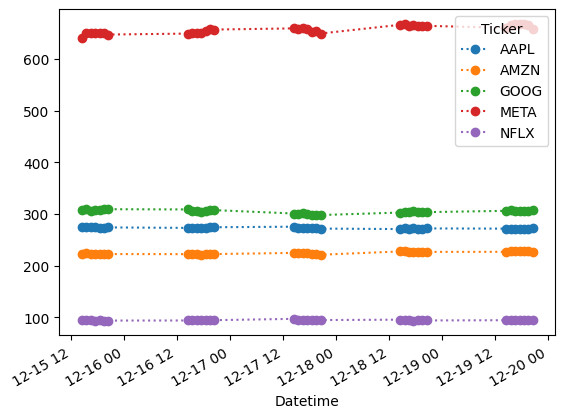

In [13]:
# plot the Close prices in the DataFrame, with a dotted line 
# and dots for datapoints
df_to_plot["Close"].plot(linestyle = 'dotted', marker="o")

The stock market plot above shows **large gaps** in the data, which correspond to 
times when the NASDAQ is officially not trading.  
(In reality, NASDAQ pre-trading and 
post-trading hours extend to [16 hours a day](https://www.cnbc.com/2025/12/16/nasdaq-moves-to-near-24-hour-trading-some-say-thats-a-bad-idea.html), 
but for the purposes of this data analysis we have restricted our download to standard trading hours.)   

It is the convention for stock prices to be plotted so that we **skip over these closed times**.

Below is a function that plots the Close prices and Trading Volume data from a 
DataFrame, and saves the resulting plot as a PNG.  
To skip over the non-trading times, it plots the datapoints equally spaced 
on the x-axis, and then uses custom x-axis labels to mark the dates and times 
of each trading session.   
(I am following the example in this 
[answer](https://stackoverflow.com/a/65836503) to a StackOverflow question, 
"Matplotlib: How to skip a range of hours when plotting with a datetime axis?")



Plot created at plots/20251221-235144.png


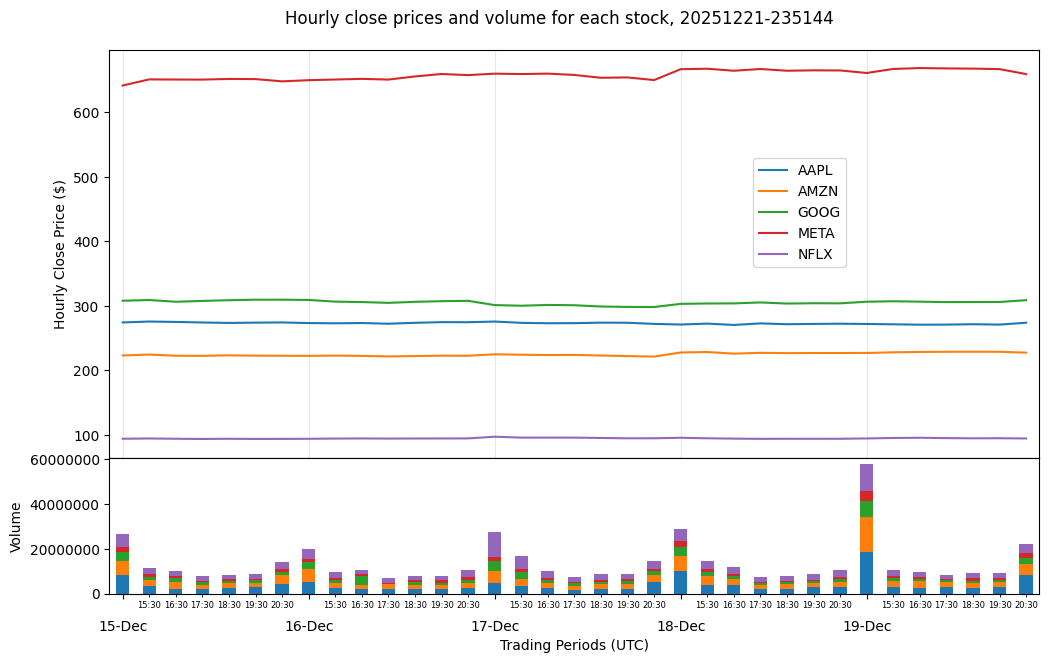

In [14]:
# Function to create PNG plot of supplied data into supplied directory.
def make_png_from_finance_data(dataframe, datetime_string, output_directory):

    # Create figure and matplotlib plots with some additional formatting
    fig, (top, bot) = plt.subplots(2, 1, sharex=True, figsize=(12,8),
                            gridspec_kw=dict(height_ratios=[0.75,0.25]))

    # remove vertical space between subplots
    fig.subplots_adjust(hspace=0)

    # plot Close prices and Trading Volume on separate subplots. 
    # Close prices are plotted without using the datetimes in the data index, 
    # i.e. the close prices are plotted equally spaced on the x-axis. 
    # Volume data is plotted as a stacked bar plot. 
    dataframe["Close"].plot(ax=top, use_index=False)
    dataframe["Volume"].plot(ax=bot, kind='bar', stacked=True, legend=None)

    # set plot title including the datetime string supplied as argument
    plt.suptitle("Hourly close prices and volume for each stock, " 
                + datetime_string, y=0.93)
    
    # set labels for x-axis and both y-axes
    bot.set_xlabel("Trading Periods (UTC)")
    bot.set_ylabel("Volume")
    top.set_ylabel("Hourly Close Price ($)")

    # Set fixed major and minor x-tick locations. 
    # Date ticks / major ticks are the start of each trading day at 14:30 UTC. 
    ticks_date = dataframe.index.indexer_at_time('14:30')
    top.set_xticks(ticks_date)
    # Time ticks / minor ticks are every hourly datapoint/  
    ticks_time = np.arange(dataframe.index.size) # step in hours
    top.set_xticks(ticks_time, minor=True)

    # add vertical gridlines at the start of each day
    top.grid(axis='x', alpha=0.3)

    # set legend location
    top.legend(loc='center right', bbox_to_anchor=(0.8, 0.6))

    # Format major and minor tick labels
    bot.ticklabel_format(axis="y", style="plain")
    bot.tick_params(axis='x', which='minor', labelsize=6, rotation=90)
    labels_date = [maj_tick.strftime('\n%d-%b').replace('\n0', '\n')
                    for maj_tick in dataframe.index[ticks_date]]
    labels_time = [min_tick.strftime('%H:%M')
                    for min_tick in dataframe.index[ticks_time]]
    bot.set_xticklabels(labels_date)
    bot.set_xticklabels(labels_time, minor=True)
    bot.figure.autofmt_xdate(rotation=0, ha='center', which='both')

    # Save plot to file
    plt.savefig(output_directory + datetime_string + ".png", dpi=300)

    # Print message for user
    print(f"Plot created at {output_directory + datetime_string}.png")

# Run this function on our read-in DataFrame
make_png_from_finance_data(df_to_plot, data_timestamp_string, plot_dir)


### Putting it all together

Directory exists at data/
Directory data/ contains 6 files with appropriate filenames: the latest one is 20251221-235144.csv.
Read in: data/20251221-235144.csv


Plot created at plots/20251221-235144.png


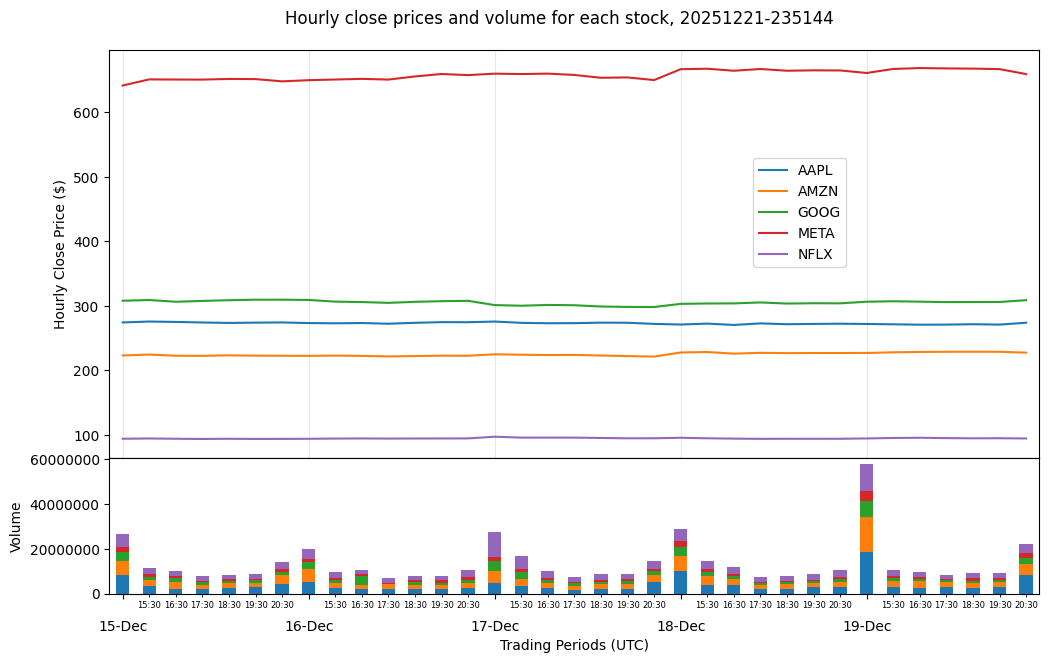

In [15]:
# Function to open latest data file, plot the Close prices, and save as PNG
def plot_data():
    """Function to open latest data file, plot the Close prices, 
    and save as PNG.
    """

    # Check if the data directory exists
    check_directory(data_read_dir)

    # Get the filename of the latest valid data file in the data directory 
    data_read_filename = get_latest_valid_file(data_read_dir)

    # Read stock data from csv into dataframe
    df_to_plot = read_stock_data_from_csv(data_read_dir + data_read_filename)

    # Get the timestamp of the data from the CSV filename
    data_timestamp_string = remove_filename_extension(data_read_filename)

    # Create PNG plot of the data
    make_png_from_finance_data(df_to_plot, data_timestamp_string, plot_dir)

# Run this function - this will re-read and re-plot the latest stored CSV data.
plot_data()


## Problem 3: Script
Brief:  
> Create a Python script called `faang.py` in the root of your repository. Copy the above functions into it and make it so that whenever someone at the terminal types `./faang.py`, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

### Creating the `faang.py` script

To create the `faang.py` script, the following items are placed in a text file called `faang.py` in the root of the repository:
- all of the library imports at the start of this notebook
- all of the functions defined in this notebook
- definition statements for the variables
    * `tickers`
    * `data_output_dir`
    * `data_read_dir`
    * `plot_dir`
- statements to call the two major functions
    * `get_data()`
    * `plot_data()`

### Adding shebang line to `faang.py` script  
The line `#! /usr/bin/env python` is inserted as the first line of the `faang.py` script. This tell the terminal which interpreter to use to interpret the script file. In this case, the shebang instructs the shell to use the first python interpreter in the environment's path.

(ref [StackOverflow: Why do people write "#!/usr/bin/env python" on the first line of a Python script?](https://stackoverflow.com/questions/2429511/why-do-people-write-usr-bin-env-python-on-the-first-line-of-a-python-script))

### Changing the file permissions on `faang.py` to allow execution  

After creation, the file `faang.py` has global read and write permissions, meaning that it can be read and written to but cannot be executed as a script.   
This can be seen using `ls -l ./faang.py`, which shows read-write (`rw-`) permissions for each of: 
  - the user (file owner) 
  - the group (users in the same group as the file owner)
  - others (all other users.)  

(As I am using a GitHub codespace for this exercise, my user is `codespace`.)

> ```
> (main) $ ls -l ./faang.py
> -rw-rw-rw- 1 codespace codespace 8881 Dec 19 16:26 ./faang.py
> ```

To change the file permissions, I use the shell command `chmod` and supply the parameter `755`. (Ref [Wikipedia: Chmod](https://en.wikipedia.org/wiki/Chmod))  
This parameter uses octal values to indicate the desired permissions:
- user class: read, write, and execute; 7 => (4 + 2 + 1)
- group class: read and execute; 5 => (4 + 1)
- others class: read and execute; 5 => (4 + 1)

> ```
> (main) $ chmod 755 ./faang.py
> ```

I can use `ls -l ./faang.py` again to see the changed access permissions on this file:

> ```
> (main) $ ls -l ./faang.py
> -rwxr-xr-x 1 codespace codespace 8881 Dec 19 16:26 ./faang.py
> ```

This set of permissions is useful in a multi-user enviroment, as it allows other users to see and use my scripts but not modify them.

## Problem 4: Automation

Brief:  
> Create a [GitHub Actions workflow](https://docs.github.com/en/actions) to run your script every Saturday morning.  
> The script should be called `faang.yml` in a `.github/workflows/` folder in the root of your repository.  
> In your notebook, explain each of the individual lines in your workflow.

### Automation Overview

[GitHub Actions](https://docs.github.com/en/actions) [workflows](https://docs.github.com/en/actions/concepts/workflows-and-actions/workflows) 
are configurable automated processes that can perform one or several jobs.

Each workflow's jobs, name, permissions etc. are specified by a [YAML configuration file](https://docs.github.com/en/actions/reference/workflows-and-actions/workflow-syntax#about-yaml-syntax-for-workflows) inside the repository directory `.github/workflows`.

The jobs defined in a workflow are executed by virtual machines called [runners](https://docs.github.com/en/actions/concepts/runners/github-hosted-runners#overview-of-github-hosted-runners). Runners can clone repository files to their local space, install software, run scripts and commands, and with the right permissions they can commit their results back to the main repository.



### YAML configuration file breakdown

Below is the configuration file `faang.yml` created in my repository to satisfy 
the assignment brief.   
This file is adapted from 
[the YAML file created in the lecture materials](https://github.com/ianmcloughlin/computer-infrastructure/blob/main/.github/workflows/update-data.yml).  
An explanation precedes each section of the configuration file.


- Sets the name of this workflow
> ```yaml 
> name: Run faang.py and push changes 
> ```

- Sets conditions that will trigger this workflow.  
  * [`workflow_dispatch`](https://docs.github.com/en/actions/reference/workflows-and-actions/events-that-trigger-workflows#workflow_dispatch) means the workflow can be manually triggered on GitHub.com.  
  * The [`cron`](https://en.wikipedia.org/wiki/Cron) parameter will trigger the workflow on a regular schedule.
The schedule is set by the five-digit expression representing day of the week, month, day of the month, hour, and minute. 
([crontab.guru](https://crontab.guru/) is a helpful tool to figure out the correct string.) 
> ```yaml
> on:
>   workflow_dispatch:   # allows manual runs
>   schedule:
>     # From: https://crontab.guru/#0_9_*_*_6
>     - cron: "0 9 * * 6"   # runs at 0900 on Saturdays
> ```

- Sets permissions to allow the runner to commit to the main repository
> ```yaml 
> permissions:
>   contents: write   # required to push changes
> ```

- Specifies the virtualised operating system which the runner should use
> ```yaml 
> jobs:
>   run-download:
>     runs-on: ubuntu-latest
> ```

- The runner checks out a copy of the repository to operate on
> ```yaml
>     steps:
>       - name: Checkout repository
>         uses: actions/checkout@v4
>         with:
>           token: ${{ secrets.GITHUB_TOKEN }}  # default token with write permissions
>           fetch-depth: 0                      # ensure full history for committing
> ```

- The runner sets up a Python environment
> ```yaml
>       - name: Set up Python
>         uses: actions/setup-python@v5
>         with:
>           python-version: "3.x"
> ```

- Installs the Python modules and libraries that are listed in requirements.txt
> ```yaml
>       - name: Install dependencies (optional)
>         run: |
>           pip install -r requirements.txt || true
> ```


- Runs the script `faang.py` from the root of the repository.
This will create new files in the runner's checked-out version of the repo.
> ```yaml
>       - name: Run faang.py
>         run: |
>           python ./faang.py
> ```

- Sets the user name and email with which its commits will be signed.
- Git-adds all files, and if there are staged changes, they are committed.
> ```yaml
>       - name: Commit changes
>         run: |
>           git config --global user.name "github-actions" 
>           git config --global user.email "github-actions@github.com"
>           git add -A
>           git diff --quiet --cached || git commit -m "Automated update from faang.py"
> ```

- Pushes the committed changes to the main branch of the repository. 
The new CSV file and PNG plot are now visible on github.com.
> ```yaml
>       - name: Push changes
>         run: |
>           git push origin HEAD
> ```

### Note on timing of GitHub Workflow actions  
As can be seen from the files in this repository, the workflow does not necessarily take place exactly when triggered.  
Although the workflow is configured to run at 0900, the resulting data download and file creation may not occur until some time later, e.g. [this plot created by workflow at 09:22](plots/20251220-092224.png). 

This delay is because GitHub Workflows use GitHub's computational resources, and there is a queue of workflows; delays are to be expected during [periods of high activity](https://docs.github.com/en/actions/how-tos/troubleshoot-workflows#scheduled-workflows-running-at-unexpected-times), which include the start of every hour. It would be advisable in future to choose a workflow trigger time at an odd minute, such as 09:43.

If this project needed a script to be executed at a very specific time, or very frequently, then GitHub Actions would not be suitable and a different hosting solution would provide more control. This would be an example of changing to a more appropriate infrastructure for a specific computational requirement.

## Conclusion
This project develops a clean and maintainable pipeline to automate the collection, storage and visualisation of financial data, with minimal manual intervention.  
The pipeline uses widely available and well-documented tools, including Python for data manipulation and plotting and GitHub Actions for scheduled execution. Using such tools keeps the pipeline reproducible, transparent, and easier to maintain.

The resulting repository presents a well-documented workflow, showing effective development practices and clear explanation of concepts.  
The implementation of both local execution and automated cloud execution shows the benefits of selecting infrastructure that matches both the computational requirements of the task and the needs of the end-user.


## End